## Importing libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
%load_ext tensorboard

import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.17.0


In [6]:
# Set seed
from numpy.random import seed
seed(1)

In [7]:
print("Number of GPUs available: ", len(tf.config.experimental.list_physical_devices("GPU")))

Number of GPUs available:  0


## Loading the FMNIST data

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
# Create an array to access the Class name based on label number
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [16]:
print(len(X_train), len(X_test))

60000 10000


In [17]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

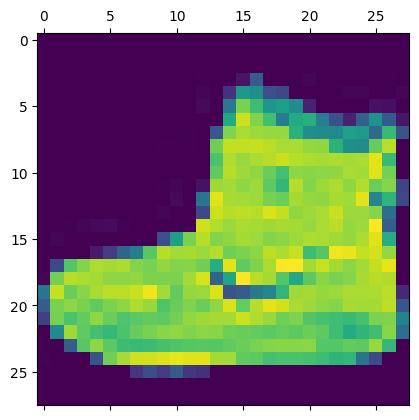

In [18]:
plt.matshow(X_train[0])

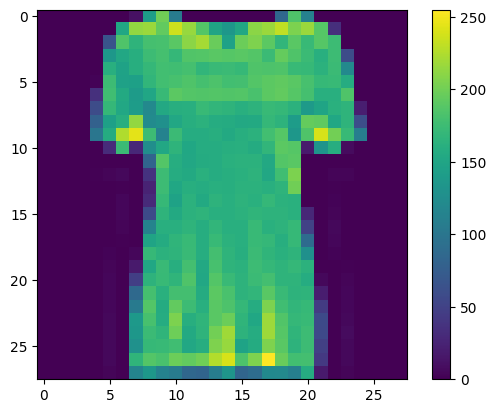

In [19]:
# Check the range of pixel values
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

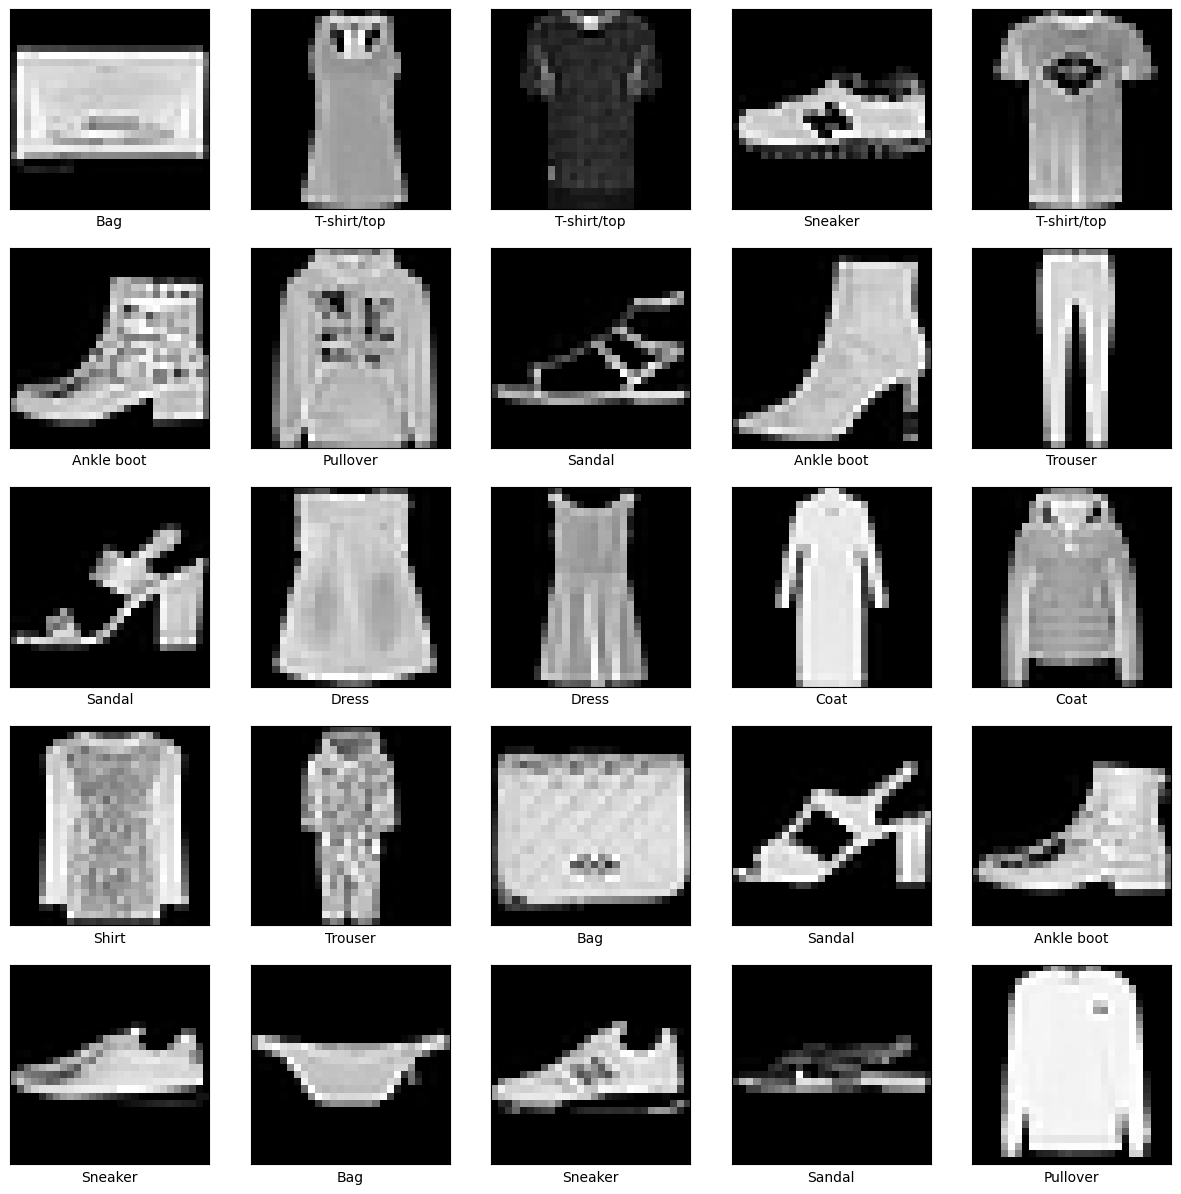

In [20]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0, len(X_train))
    plt.imshow(X_train[rand_no], cmap="gray")
    plt.xlabel(class_names[y_train[rand_no]])

## Normalizing the pixel values

In [21]:
X_train = X_train/255.0
y_train = y_train/255.0

## Clear logs from previous runs (tensorboard)

In [24]:
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## Defining the model

In [26]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    # hidden layer = 512 neurons
    model.add(Dense(512, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    return model

In [27]:
model = create_model()
model.summary()
model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics= ["accuracy"])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
TensorBoard_callback = TensorBoard(log_dir,histogram_freq=1)
EarlyStopping_callback = EarlyStopping(monitor="val_loss",
                                       min_delta = 0,
                                       patience = 3,
                                       mode = "auto",
                                       baseline = None,
                                       restore_best_weights=True)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(x = X_train,
          y = y_train,
          epochs = 20,
          validation_split = 0.2,
          callbacks = [TensorBoard_callback, EarlyStopping_callback])

Epoch 1/20


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.0975 - loss: 0.0157 - val_accuracy: 0.1030 - val_loss: 5.4081e-07
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.0989 - loss: 3.9795e-07 - val_accuracy: 0.1030 - val_loss: 6.7429e-08
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.0997 - loss: 8.1714e-08 - val_accuracy: 0.1030 - val_loss: 2.4308e-08
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.0989 - loss: 3.0761e-08 - val_accuracy: 0.1030 - val_loss: 1.0659e-08
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0980 - loss: 1.6671e-08 - val_accuracy: 0.1030 - val_loss: 5.4637e-09
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.0994 - loss: 1.1581e-08 - val_accuracy: 0.1030 - val_loss: 3.0001e-09
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1003 - loss: 3.1772e-09 - val_accuracy: 0.1030 - val_loss: 1.6391e-09
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━

## Model Evaluation

In [32]:
# %tensorboard --logdir logs/fit

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1001 - loss: 27275.0352

Test accuracy: 0.10000000149011612


In [34]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [35]:
predictions.shape

(10000, 10)

In [44]:
class_names[np.argmax(predictions[120])]

'T-shirt/top'

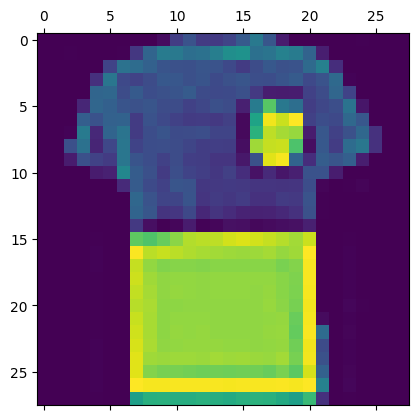

In [42]:
# plt.imshow(X_test[189], cmap="gray")
plt.matshow(X_test[120])

In [59]:
# def plot_image(i, predictions_array, true_label, img):
#     true_label, img = true_label[i], img[i]
#     plt.grid(False)
#     plt.xticks([])
#     plt.yticks([])

#     plt.imshow(img, cmap=plt.cm.binary)

#     predicted_label = np.argmax(predictions_array)
#     if predicted_label == true_label:
#         color = 'blue'
#     else: 'red'

#     plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
#                                      100*np.max(predictions_array),
#                                      class_names[true_label]),
#                                      color = color)

In [56]:
# Example reshaping for 28x28 grayscale images
X_test = X_test.reshape(-1, 28, 28)


In [60]:
# # Plot the first X test images, their predicted labels, and the true labels.
# # Color correct predictions in blue and incorrect predictions in red.

# num_rows = 5
# num_cols = 3
# num_images = num_rows*num_cols
# plt.figure(figsize=(2*2*num_cols, 2*num_rows))
# for i in range (num_images):
#     plt.subplot(num_rows, 2*num_cols, 2*i+1)
#     plot_image(i, predictions[i], y_train, y_test)
#     plt.tight_layout()
#     plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_7780\4232278204.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent overlap


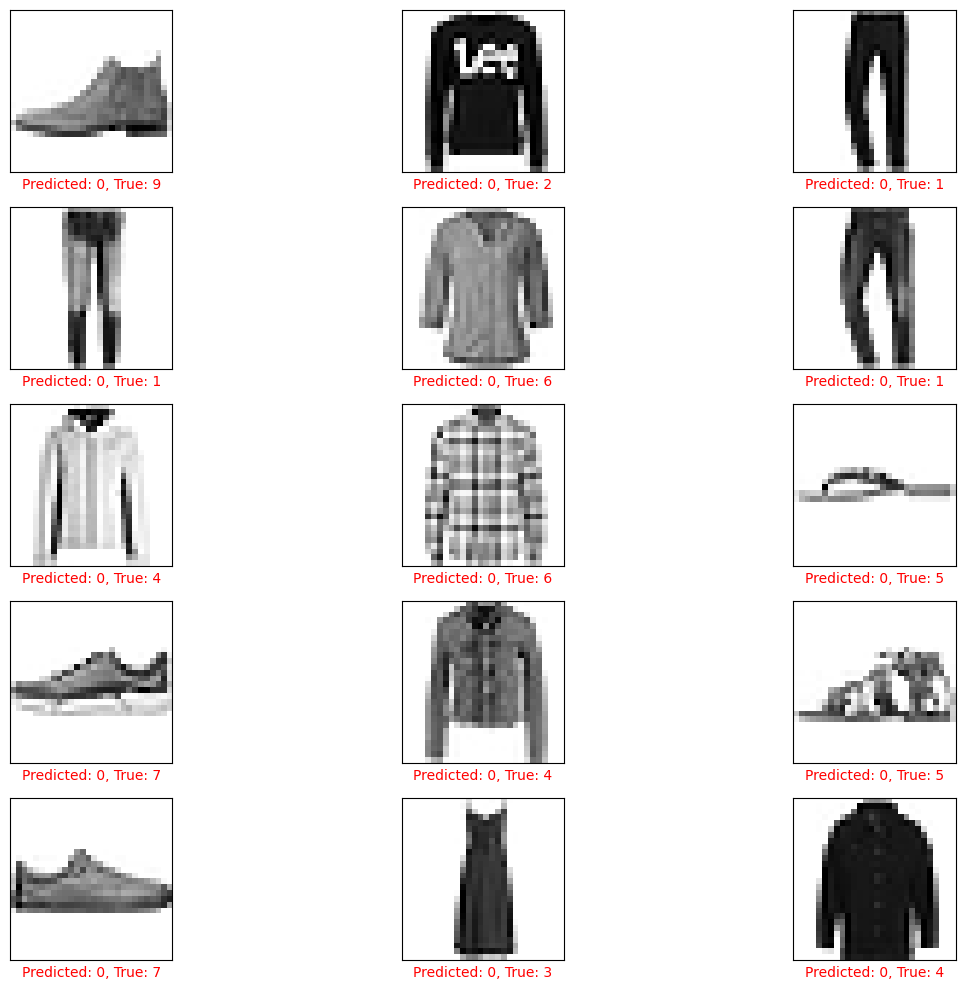

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Define the plot_image function
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # Display the image with correct colormap
    plt.imshow(img, cmap=plt.cm.binary)
    
    # Get the predicted label
    predicted_label = np.argmax(predictions_array)
    
    # Set color to blue if correct prediction, else red
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    # Display the label with appropriate color
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)

# Example dataset shapes (ensure X_test is in the correct shape)
# If your images are 28x28 grayscale, make sure they are reshaped accordingly
# Example: X_test = X_test.reshape(-1, 28, 28)

# Number of rows and columns for plotting
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

# Create a figure with appropriate size
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

# Loop through the first num_images to plot them
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    # Call the plot_image function to plot the image with predictions
    plot_image(i, predictions[i], y_test, X_test)
    
    plt.tight_layout()  # Adjust layout to prevent overlap

# Show the figure
plt.show()
